In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16969655947690786607
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5732106240
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13768406492019747737
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:2b:00.0, compute capability: 8.6"
]


In [2]:
import os, shutil

In [3]:
original_dataset_dir = 'datasets/train'

base_dir = 'datasets/cats_and_dogs_small'

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
print('훈련용 고양이 이미지 전체 개수 :', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수 :', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수 :', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수 :', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수 :', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수 :', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수 : 1000
훈련용 강아지 이미지 전체 개수 : 1000
검증용 고양이 이미지 전체 개수 : 500
검증용 강아지 이미지 전체 개수 : 500
테스트용 고양이 이미지 전체 개수 : 500
테스트용 강아지 이미지 전체 개수 : 500


In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models
with tf.device('/GPU:0'):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [7]:
from tensorflow.keras import optimizers
with tf.device('/GPU:0'):
    model.compile(loss='binary_crossentropy', \
        optimizer=optimizers.RMSprop(lr=1e-4), 
        metrics=['acc'])

C:\Users\zxwlg\miniconda3\envs\tf\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [10]:
with tf.device('/GPU:0'):
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50
    )

C:\Users\zxwlg\miniconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 15s 89ms/step - loss: 0.6885 - acc: 0.5435 - val_loss: 0.6836 - val_acc: 0.5370
Epoch 2/30
100/100 [==============================] - 3s 29ms/step - loss: 0.6564 - acc: 0.6145 - val_loss: 0.6379 - val_acc: 0.6370
Epoch 3/30
100/100 [==============================] - 3s 29ms/step - loss: 0.6096 - acc: 0.6525 - val_loss: 0.6123 - val_acc: 0.6530
Epoch 4/30
100/100 [==============================] - 3s 28ms/step - loss: 0.5670 - acc: 0.7165 - val_loss: 0.5963 - val_acc: 0.6680
Epoch 5/30
100/100 [==============================] - 3s 27ms/step - loss: 0.5364 - acc: 0.7400 - val_loss: 0.5653 - val_acc: 0.7100
Epoch 6/30
100/100 [==============================] - 3s 28ms/step - loss: 0.5010 - acc: 0.7530 - val_loss: 0.5654 - val_acc: 0.6990
Epoch 7/30
100/100 [==============================] - 3s 28ms/step - loss: 0.4825 - acc: 0.7735 - val_loss: 0.5554 - val_acc: 0.7190
Epoch 8/30
100/100 [==============================] - 3s 28ms/step -

In [11]:
model.save('cats_and_dogs_small_1.h5')

In [14]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

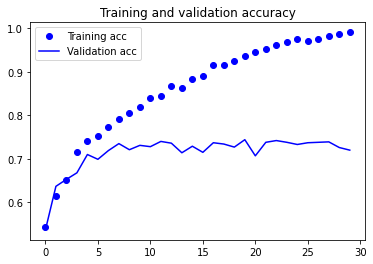

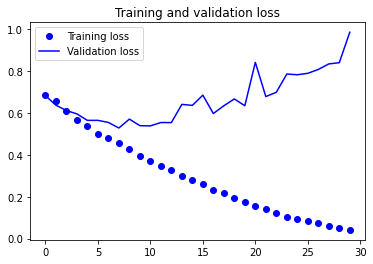

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history["val_acc"]
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

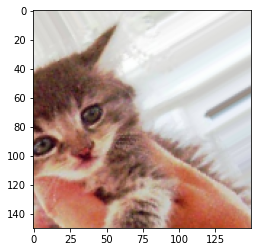

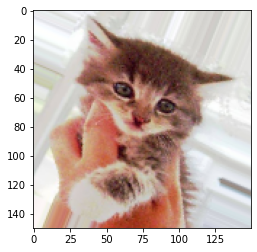

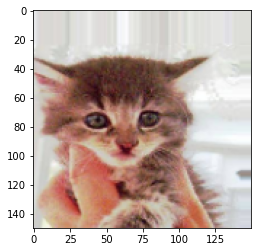

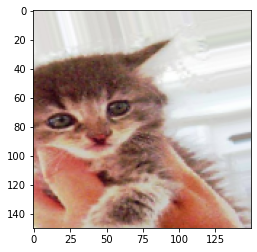

In [18]:
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure()
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [30]:
with tf.device('/GPU:0'):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', \
        optimizer=optimizers.RMSprop(learning_rate=1e-4),
        metrics=['acc'])

In [31]:
with tf.device('/GPU:0'):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range = 40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
    )

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=25,
        class_mode='binary'
    )

    validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=25,
        class_mode='binary'
    )

    history = model.fit(
        train_generator,
        steps_per_epoch=40,
        epochs=300,
        validation_data=validation_generator,
        validation_steps=20
    )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/300
40/40 [==============================] - 5s 99ms/step - loss: 0.6974 - acc: 0.5230 - val_loss: 0.6926 - val_acc: 0.4960
Epoch 2/300
40/40 [==============================] - 4s 101ms/step - loss: 0.6943 - acc: 0.5140 - val_loss: 0.6859 - val_acc: 0.5160
Epoch 3/300
40/40 [==============================] - 4s 98ms/step - loss: 0.6930 - acc: 0.5160 - val_loss: 0.6885 - val_acc: 0.5220
Epoch 4/300
40/40 [==============================] - 4s 98ms/step - loss: 0.6895 - acc: 0.5440 - val_loss: 0.6896 - val_acc: 0.4960
Epoch 5/300
40/40 [==============================] - 4s 99ms/step - loss: 0.6863 - acc: 0.5490 - val_loss: 0.6736 - val_acc: 0.6460
Epoch 6/300
40/40 [==============================] - 4s 98ms/step - loss: 0.6844 - acc: 0.5720 - val_loss: 0.6846 - val_acc: 0.4980
Epoch 7/300
40/40 [==============================] - 4s 99ms/step - loss: 0.6775 - acc: 0.5640 - val_loss: 0.6629 - val_acc

In [32]:
model.save('cats_and_dogs_small_2.h5')

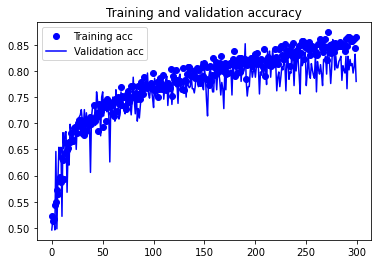

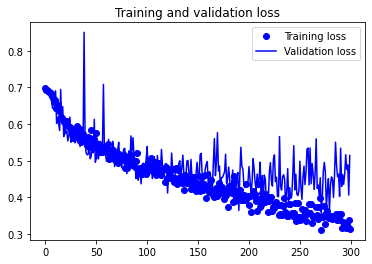

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()